# Analiza Sentiment leksikona -SWN 3.0 mapiranog na srpski.



In [1]:

import pandas as pd

In [2]:

RES_DIR = "..\\resources\\"
MOD_DIR = "..\\ml_models\\"


Odve se učitava leksikon. Svi leksikoni su snimljeni us dva falja. Falj sa _a ima i vrste reči radi analize. 

In [3]:
sent_an = pd.read_csv(RES_DIR + "swn30_sentiment.csv",  index_col=0)

In [4]:
sent_an["OBJ"] = 1-( sent_an["NEG"]+sent_an["POS"])

In [5]:
sent_an

,Lemme,Vrsta,POS,NEG,OBJ
ID,,,,,
ENG30-03574555-n,ustanova,n,0.00,0.00,1.00
ENG30-07810907-n,začin,n,0.00,0.25,0.75
ENG30-00721431-n,mesto,n,0.00,0.00,1.00
ENG30-00473799-v,"obnoviti,doterati,uglancati,uljuditi",v,0.00,0.00,1.00
ENG30-00903385-v,oprostiti,v,0.25,0.00,0.75
...,...,...,...,...,...
ENG30-15266265-n,mandat,n,0.00,0.00,1.00
ENG30-15266685-n,sredina,n,0.00,0.00,1.00
ENG30-15266911-n,"gotovo,konac,kraj,prestanak,svršetak,završetak",n,0.00,0.00,1.00


In [6]:
pd.set_option('display.max_rows', None)

## Statistike

Raspored reči prema pozitivnom polaritetu 

In [7]:
sent_an["POS"].value_counts()

POS
0.00000    23139
0.12500      882
0.25000      424
0.37500      287
0.50000      223
0.62500      105
0.00013       63
0.75000       51
0.00038       30
0.00050       29
0.00025       24
0.00063       22
0.87500       19
1.00000        6
0.00075        4
0.00500        2
0.33300        2
0.44400        1
0.00088        1
0.22200        1
0.55600        1
0.00044        1
0.02500        1
0.80000        1
0.07500        1
Name: count, dtype: int64

In [8]:
sent_an[sent_an["POS"]>.9]["Lemme"]

ID
ENG30-13987905-n    blaženstvo,sedmo nebo,deveto nebo
ENG30-01777210-v               dopadati se,sviđati se
ENG30-13987423-n                                sreća
ENG30-10523076-n                           istraživač
BILI-00000163                            istraživački
ENG30-01828736-v                       voleti,uživati
Name: Lemme, dtype: object

In [47]:
sent_an[sent_an["POS"]>.9][["Lemme", "POS"]].to_clipboard()

Raspored reči prema negativnom polaritetu 

In [9]:
sent_an["NEG"].value_counts()

NEG
0.00000    23040
0.12500      748
0.25000      502
0.37500      251
0.50000      238
0.62500      185
0.75000      124
0.00013       58
0.00025       43
0.87500       37
0.00063       25
0.00050       21
0.00075       16
0.00038       16
0.02500        5
0.00088        3
0.66700        2
0.00056        1
0.07500        1
0.55600        1
0.77800        1
0.44400        1
1.00000        1
Name: count, dtype: int64

In [10]:
sent_an[sent_an["NEG"]>.9]["Lemme"]

ID
ENG30-06714976-n    ?disrespect,?discourtesy
Name: Lemme, dtype: object

In [49]:
sent_an[sent_an["NEG"]>.9][["Lemme", "NEG"]].to_clipboard()

In [45]:
#make copy of sent_an for rounding
sent_an_rnd = sent_an.copy()


# Round the columns 'POS', 'NEG', and 'OBJ' to 3 decimal places
sent_an_rnd[['POS', 'NEG', 'OBJ']] = sent_an_rnd[['POS', 'NEG', 'OBJ']].round(3)

count_pos = sent_an_rnd['POS'].value_counts()
count_neg = sent_an_rnd['NEG'].value_counts()
count_obj = sent_an_rnd['OBJ'].value_counts()

# combine in one dataframe
count_df = pd.DataFrame({'POS No': count_pos, 'NEG No': count_neg, 'OBJ No': count_obj})

#fill NaN values with 0
count_df.fillna(0, inplace=True)

#rename index as score
count_df.index.name = 'score'

pd.set_option('display.float_format', lambda x: '%.3f' % x)

#add percentage columns and set format dd.ddd, 
count_df['POS %'] = (count_df['POS No'] / count_df['POS No'].sum() * 100).apply(lambda x: f"{x:.3f}")
count_df['NEG %'] = (count_df['NEG No'] / count_df['NEG No'].sum() * 100).apply(lambda x: f"{x:.3f}")
count_df['OBJ %'] = (count_df['OBJ No'] / count_df['OBJ No'].sum() * 100).apply(lambda x: f"{x:.3f}")


#sort columns in order of POS, NEG, OBJ, No thne %

count_df = count_df[['POS No', 'POS %', 'NEG No', 'NEG %', 'OBJ No', 'OBJ %']]




#copy to clipboard

count_df.to_clipboard()


Raspored reči prema objektivnosti 

In [12]:
sent_an["OBJ"].value_counts()

OBJ
1.00000    21617
0.87500     1146
0.75000      626
0.62500      450
0.50000      447
0.37500      311
0.25000      261
0.12500      131
0.99987       61
0.99937       54
0.00000       44
0.99950       37
0.99975       33
0.99962       27
0.99925       22
0.99924       13
0.99949       12
0.99912       10
0.99974        7
0.97500        3
0.20000        1
0.99899        1
0.99900        1
0.95000        1
0.99500        1
0.90000        1
0.80000        1
0.87000        1
Name: count, dtype: int64

In [52]:
# Define bin edges
bin_edges = [i/8 for i in range(8)] + [1]
bin_labels = [f"[{bin_edges[i]}, {bin_edges[i+1]})" for i in range(len(bin_edges)-2)] + [f"[{bin_edges[-2]}, {bin_edges[-1]}]"]

# Function to bin data and get both count and percentage for each bin
def bin_data(column):
    # Manually include the value 1 in the last bin
    column = column.copy()
    column[column == 1] = 0.999999  # Temporarily set 1 to a value within the last bin
    binned_data = pd.cut(column, bins=bin_edges, labels=bin_labels, include_lowest=True, right=False)
    counts = binned_data.value_counts().sort_index()
    percentages = (counts / counts.sum()) * 100
    return pd.DataFrame({'Count': counts, 'Percentage': percentages})

# Apply the function to each column and store results in a dictionary
results = {
    'OBJ': bin_data(sent_an['OBJ']),
    'POS': bin_data(sent_an['POS']),
    'NEG': bin_data(sent_an['NEG'])
}

results

{'OBJ':                Count  Percentage
 OBJ                             
 [0.0, 0.125)      44       0.174
 [0.125, 0.25)    132       0.521
 [0.25, 0.375)    261       1.031
 [0.375, 0.5)     311       1.228
 [0.5, 0.625)     447       1.765
 [0.625, 0.75)    450       1.777
 [0.75, 0.875)    628       2.480
 [0.875, 1]     23047      91.023,
 'POS':                Count  Percentage
 POS                             
 [0.0, 0.125)   23317      92.089
 [0.125, 0.25)    883       3.487
 [0.25, 0.375)    426       1.682
 [0.375, 0.5)     288       1.137
 [0.5, 0.625)     224       0.885
 [0.625, 0.75)    105       0.415
 [0.75, 0.875)     52       0.205
 [0.875, 1]        25       0.099,
 'NEG':                Count  Percentage
 NEG                             
 [0.0, 0.125)   23229      91.742
 [0.125, 0.25)    748       2.954
 [0.25, 0.375)    502       1.983
 [0.375, 0.5)     252       0.995
 [0.5, 0.625)     239       0.944
 [0.625, 0.75)    187       0.739
 [0.75, 0.875)    125    

In [53]:
#turn results into dataframe

results_df = pd.concat(results, axis=1)

results_df




OBJ               POS               NEG           
               Count Percentage  Count Percentage  Count Percentage
[0.0, 0.125)      44      0.174  23317     92.089  23229     91.742
[0.125, 0.25)    132      0.521    883      3.487    748      2.954
[0.25, 0.375)    261      1.031    426      1.682    502      1.983
[0.375, 0.5)     311      1.228    288      1.137    252      0.995
[0.5, 0.625)     447      1.765    224      0.885    239      0.944
[0.625, 0.75)    450      1.777    105      0.415    187      0.739
[0.75, 0.875)    628      2.480     52      0.205    125      0.494
[0.875, 1]     23047     91.023     25      0.099     38      0.150

In [54]:
results_df.to_clipboard()

In [13]:
import matplotlib.pyplot as plt

## Histogrami

### Celog leksikona

array([[<Axes: title={'center': 'POS'}>, <Axes: title={'center': 'NEG'}>],
       [<Axes: title={'center': 'OBJ'}>, <Axes: >]], dtype=object)

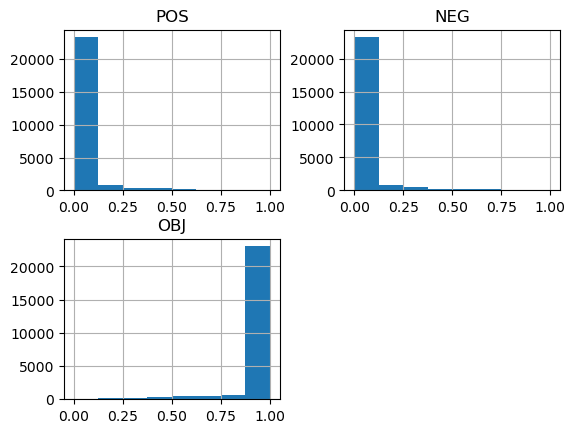

In [14]:
sent_an.hist(bins=8)

<Axes: >

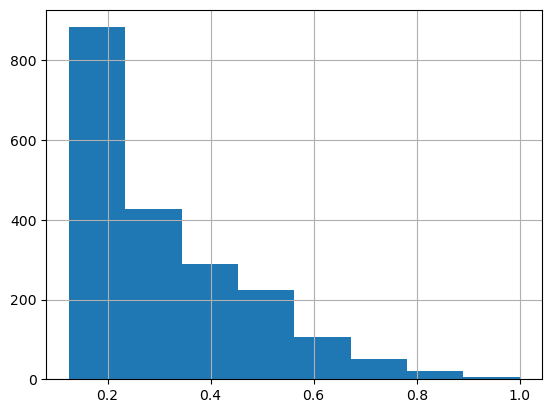

In [15]:
sent_an[sent_an["POS"]>.1]["POS"].hist(bins=8)

<Axes: >

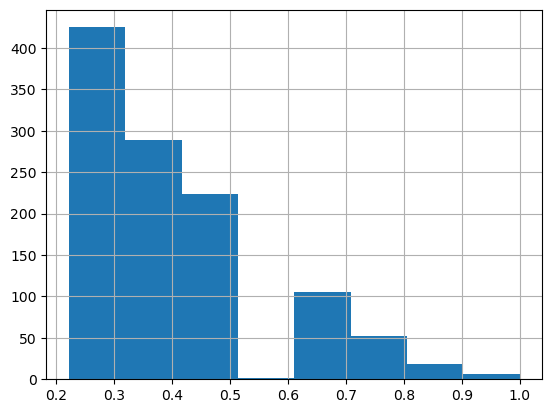

In [16]:
sent_an[sent_an["POS"]>.2]["POS"].hist(bins=8)

<Axes: >

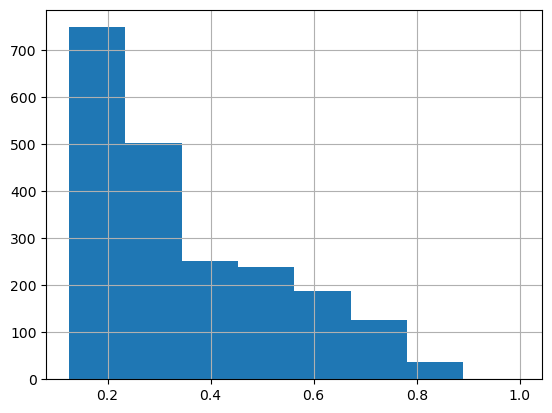

In [17]:
sent_an[sent_an["NEG"]>.1]["NEG"].hist(bins=8)

<Axes: >

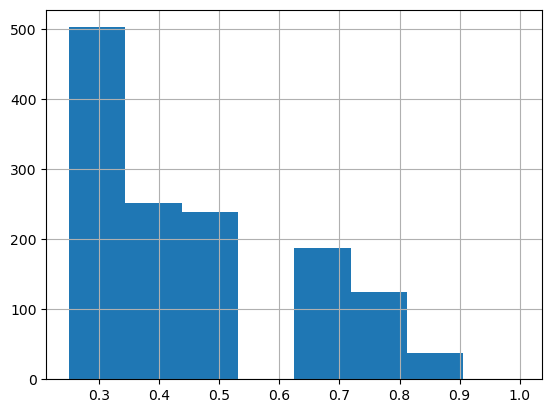

In [18]:
sent_an[sent_an["NEG"]>.2]["NEG"].hist(bins=8)

### Po Vrsti 
a - pridev <br>
v - glagol <br>
n - imenica <br>

In [19]:
sent_an["Vrsta"].value_counts(sort=True)

Vrsta
n    20080
v     2896
a     2202
b      142
Name: count, dtype: int64

<Axes: ylabel='count'>

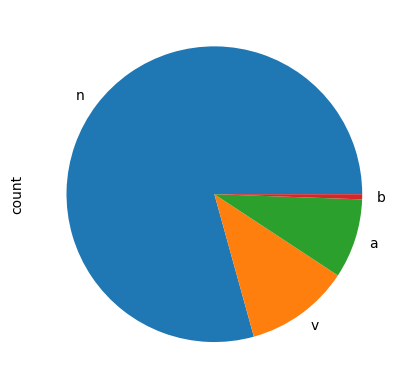

In [20]:
sent_an["Vrsta"].value_counts(sort=True).plot(kind ="pie")

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'n'}>, <Axes: title={'center': 'v'}>]],
      dtype=object)

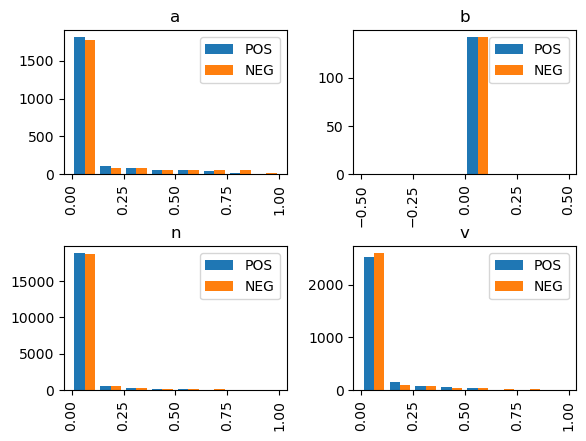

In [21]:
sent_an.hist(bins=8, by="Vrsta", legend =True, column= ["POS", "NEG"] )

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'n'}>],
       [<Axes: title={'center': 'v'}>, <Axes: >]], dtype=object)

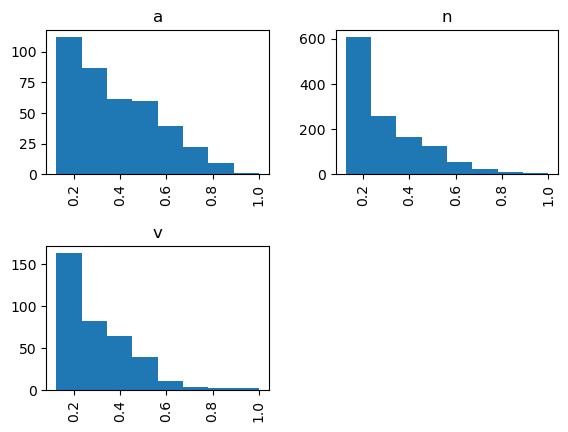

In [22]:
sent_an[sent_an["POS"]>.1].hist(bins=8, by="Vrsta", column="POS")

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'n'}>],
       [<Axes: title={'center': 'v'}>, <Axes: >]], dtype=object)

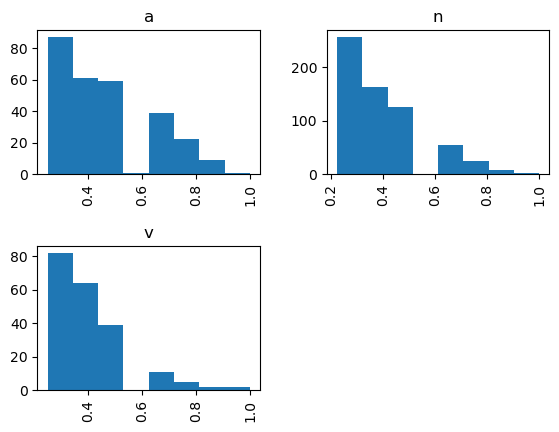

In [23]:
sent_an[sent_an["POS"]>.2].hist(bins=8, by="Vrsta", column="POS")

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'n'}>],
       [<Axes: title={'center': 'v'}>, <Axes: >]], dtype=object)

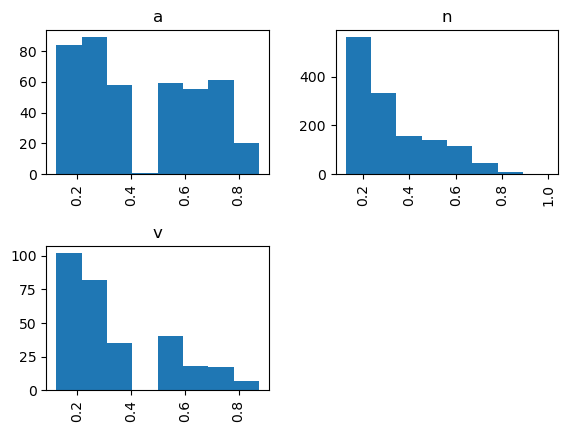

In [24]:
sent_an[sent_an["NEG"]>.1].hist(bins=8, by="Vrsta", column="NEG")

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'n'}>],
       [<Axes: title={'center': 'v'}>, <Axes: >]], dtype=object)

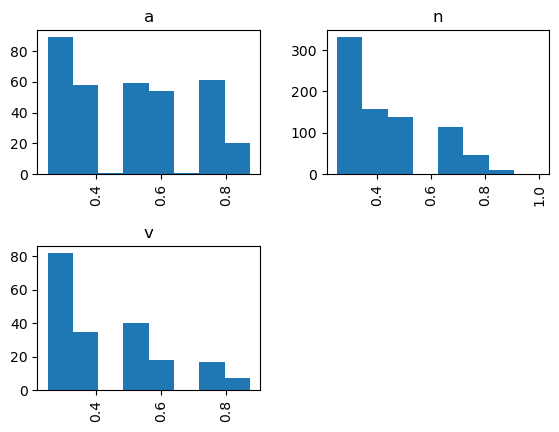

In [25]:
sent_an[sent_an["NEG"]>.2].hist(bins=8, by="Vrsta", column="NEG")

Ovde se prikazuje raspored vresnosti u odnsu na oba polariteta, ali bez vrednosti (0,0) zbog preglednosti

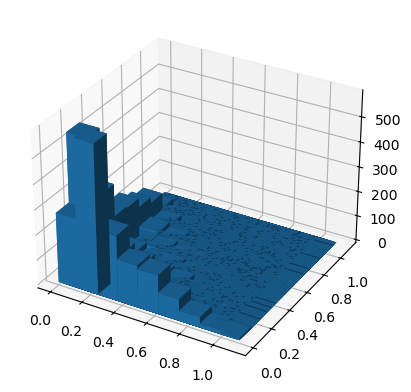

In [26]:
import numpy as np
import matplotlib.pyplot as plt

sent_bez0 = sent_an[np.logical_xor(((sent_an["POS"] ==0) & (sent_an["NEG"] == 0)), 1)]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x, y = sent_bez0["POS"], sent_bez0["NEG"]
hist, xedges, yedges = np.histogram2d(x, y, bins=64, range=[[0, 1], [0, 1]])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] , yedges[:-1] , indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 64 bars.
dx = dy = 0.125 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()

<Axes: ylabel='count'>

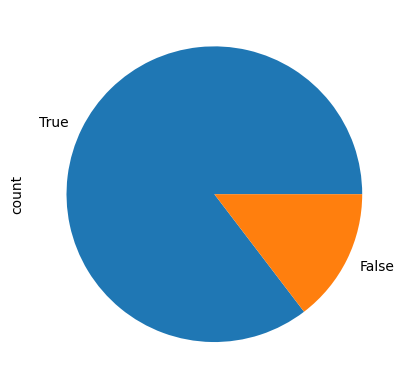

In [27]:
((sent_an["POS"] ==0) & (sent_an["NEG"] == 0)).value_counts(sort=True).plot(kind ="pie")

<Axes: xlabel='NEG'>

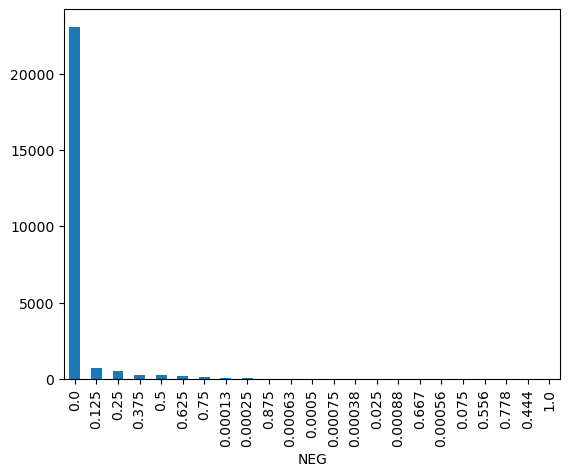

In [28]:
sent_an["NEG"].value_counts().plot(kind = "bar")

<Axes: xlabel='POS'>

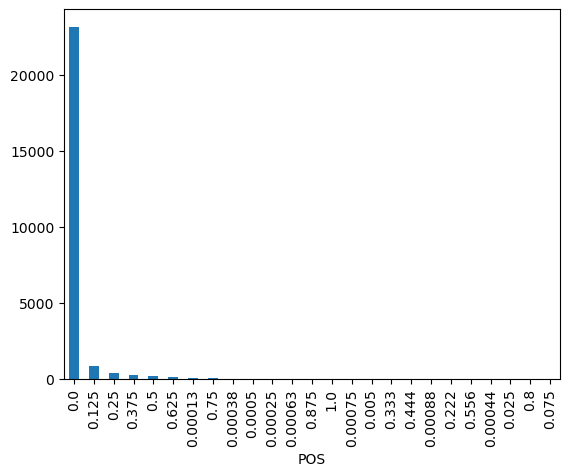

In [29]:
sent_an["POS"].value_counts().plot(kind = "bar")

In [30]:
a = sent_an[["POS","NEG"]].value_counts(sort=True)

<Axes: ylabel='count'>

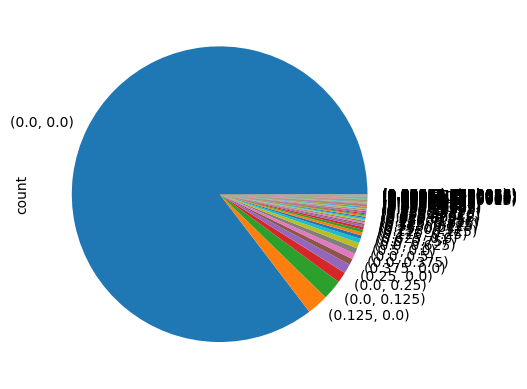

In [31]:
a.plot(kind ="pie")

In [32]:
sent_an["Vrsta"].value_counts()

Vrsta
n    20080
v     2896
a     2202
b      142
Name: count, dtype: int64

<Axes: title={'center': 'imenice-negativno'}, xlabel='NEG'>

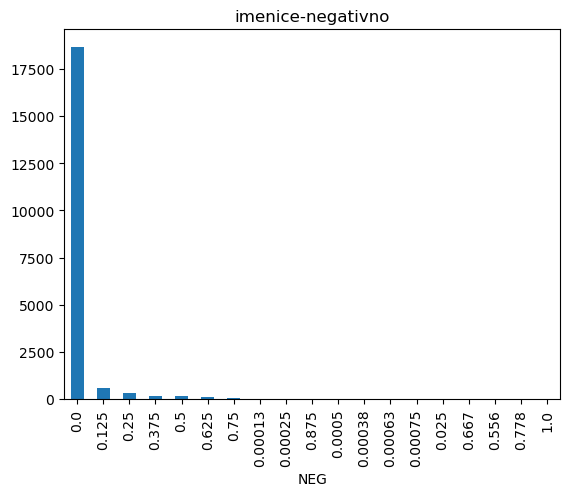

In [33]:
sent_an[sent_an["Vrsta"] == 'n']["NEG"].value_counts().plot(kind = "bar", title = "imenice-negativno")

<Axes: title={'center': 'imenica-positivno'}, xlabel='POS'>

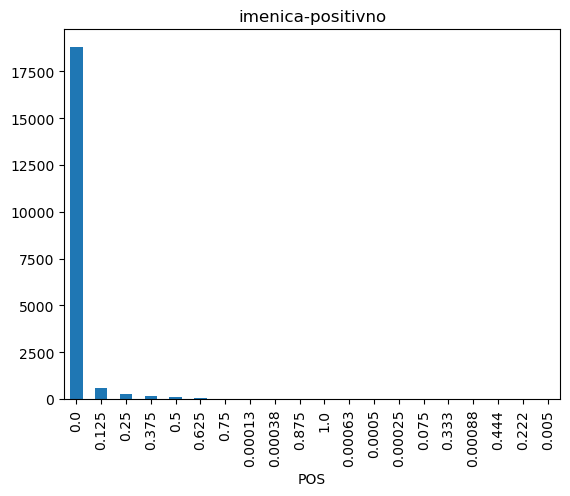

In [34]:
sent_an[sent_an["Vrsta"] == 'n']["POS"].value_counts().plot(kind = "bar", title = "imenica-positivno")

<Axes: title={'center': 'glagol-negativno'}, xlabel='NEG'>

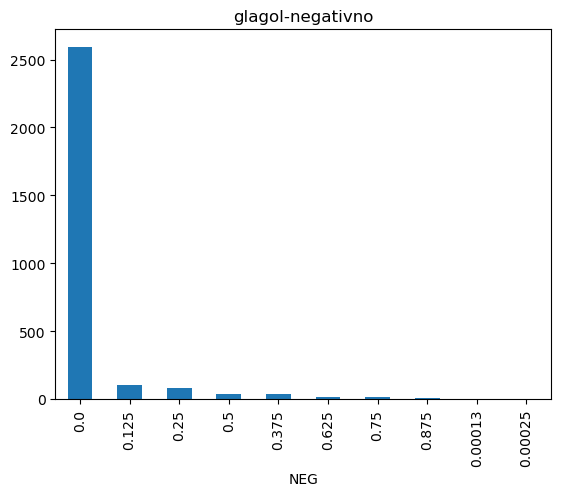

In [35]:
sent_an[sent_an["Vrsta"] == 'v']["NEG"].value_counts().plot(kind = "bar", title = "glagol-negativno")

<Axes: title={'center': 'glagol-positivno'}, xlabel='POS'>

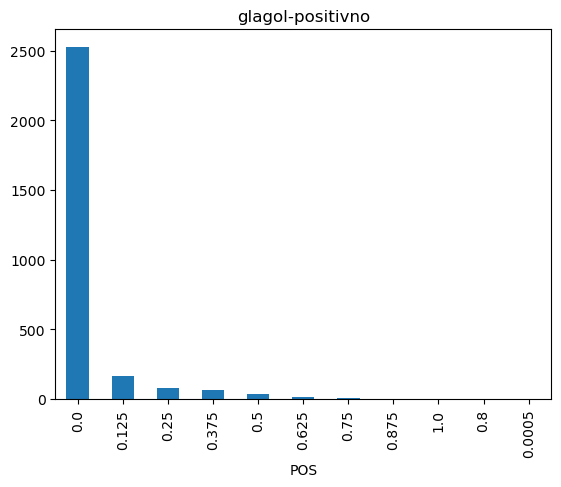

In [36]:
sent_an[sent_an["Vrsta"] == 'v']["POS"].value_counts().plot(kind = "bar", title = "glagol-positivno")

<Axes: title={'center': 'pridev-negativno'}, xlabel='NEG'>

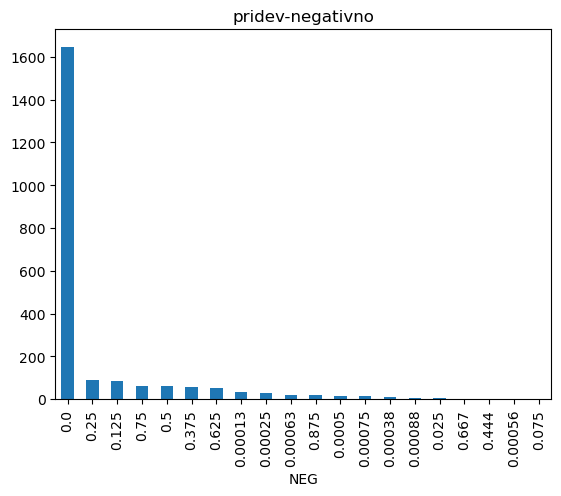

In [37]:
sent_an[sent_an["Vrsta"] == 'a']["NEG"].value_counts().plot(kind = "bar", title = "pridev-negativno")

<Axes: title={'center': 'pridev-positivno'}, xlabel='POS'>

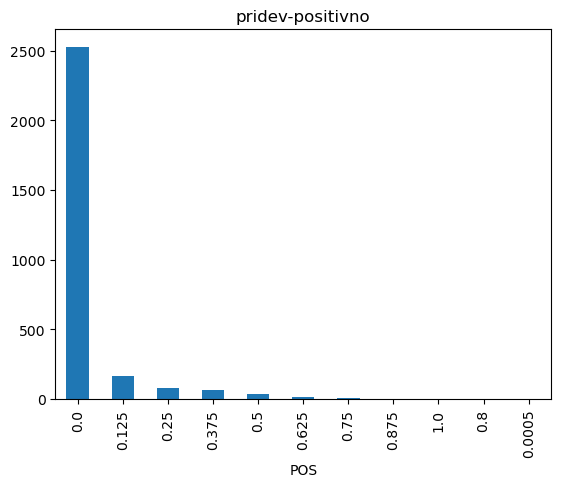

In [38]:
sent_an[sent_an["Vrsta"] == 'v']["POS"].value_counts().plot(kind = "bar", title = "pridev-positivno")

KeyError: 0

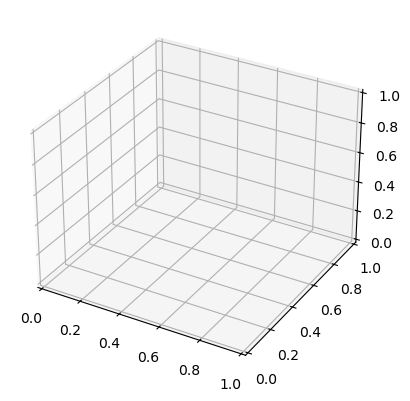

In [39]:

fig = plt.figure()
b =pd.DataFrame(a).reset_index()
ax = plt.axes(projection ='3d')
ax.scatter(b["POS"],b["NEG"],b[0], color ='green')


In [ ]:
a = sent_an[["POS","NEG", "Vrsta"]].value_counts(sort=True)
a

In [ ]:
fig = plt.figure()
c =pd.DataFrame(a).reset_index()
ax = plt.axes(projection ='3d')

b =c [c["Vrsta"]=="n"] 
ax.scatter(b["POS"],b["NEG"],b[0], color ='green')
b =c [c["Vrsta"]=="v"] 
ax.scatter(b["POS"],b["NEG"],b[0], color ='blue')
b =c [c["Vrsta"]=="a"] 
ax.scatter(b["POS"],b["NEG"],b[0], color ='red')



In [ ]:
# srbsentiwordnet2.csv
# srbsentiwordnet_a2.csv